# Capstone Project - Loan Classification

## Background
Peer to peer lending, or P2P lending, has been around for more than a decade. Loans are made out to a variety of borrowers for a variety of 

## Import libraries and data

### Import libraries
Pandas and Numpy are the libraries that will be imported at this stage. This is because, at this point, the tasks in this notebook will be to import the data and process the data so as to make it suitable for creating models

In [1]:
# Import libraries
import pandas as pd # For placing the data into dataframes for analysis
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re

from datetime import datetime

pd.set_option('display.max_columns', 160)
pd.set_option('display.max_rows', 400)

### Import and review the data
The sourced data from The Lending Club will be loaded into the notebook and reviewed before doing the necessary amendments to the data

In [2]:
accepted = pd.read_csv('../assets/accepted_2007_to_2018Q4.csv', low_memory = False)

In [3]:
# Quick look at the data imported
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
accepted.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [5]:
accepted.shape

(2260701, 151)

In [6]:
accepted.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

There are a number of columns in the dataset with a large number of null values. This will be looked into and resolved in the next stage, which is data cleaning.

<div class="alert-danger">
**The cells below are for discussion with Conor**
</div>

In [ ]:
# Convert issue date to date time format
accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])

In [ ]:
accepted['issue_d'] = accepted.issue_d.dt.to_period('m')

In [ ]:
accepted['issue_d'].head()

In [ ]:
accepted.loan_status.unique()

In [ ]:
issued_loan = accepted.value_counts(['issue_d', 'loan_status'])

In [ ]:
issd_lstat = pd.DataFrame(issued_loan)
issd_lstat.reset_index(inplace=True)
issd_lstat.rename(columns = {0: 'count'}, inplace = True)
issd_lstat.sort_values(by = ['issue_d', 'loan_status'], inplace = True)
issd_lstat.reset_index(drop = True, inplace=True)
issd_lstat.head()

In [ ]:
defaults = issd_lstat[['issue_d','count']].loc[issd_lstat.loan_status.isin(['Does not meet the credit policy. Status:Charged Off', 'Charged Off', 'Default'])]

In [ ]:
defaults.groupby('issue_d')['count'].sum().plot(figsize = (13,11), xlabel = 'Loan defaults by year', ylabel = 'No of defaults');

In [ ]:
issd_lstat.head()

In [ ]:
issd_lstat['quarter'] = pd.PeriodIndex(issd_lstat.issue_d, freq='Q')

In [ ]:
loan_stat = issd_lstat[['quarter', 'loan_status', 'count']]
loan_stat = loan_stat[((loan_stat.loan_status != 'Does not meet the credit policy. Status:Charged Off') & (loan_stat.loan_status != 'Charged Off') & (loan_stat.loan_status != 'Default'))]
loan_stat

In [ ]:
loan_stat_g = loan_stat.groupby(['quarter','loan_status']).agg({'count': 'sum'})

In [ ]:
loan_stat_g

In [ ]:
loan_stat_g.unstack().plot(kind = 'bar', stacked = True, figsize = (14,10))

In [ ]:
issued_loan = accepted.value_counts(['issue_d', 'loan_status'])
# trend = pd.DataFrame(data = accepted.groupby('issue_d')['loan_status'].count())
# trend.sort_index()

In [ ]:
iss_d = pd.DataFrame(issued_date)
iss_d.reset_index(inplace=True)
iss_d.rename(columns = {0: 'count'}, inplace = True)
iss_d.sort_values(by = ['issue_d', 'loan_status'], inplace = True)
iss_d.reset_index(drop = True, inplace=True)

In [ ]:
iss_d.head()

In [ ]:
issued_date.unstack().plot(kind='bar', stacked=True, figsize = (26, 16)  #plot a stacked grouped bar chart 
                         , title='Loan Status Frequency per month (stacked)');

In [ ]:
iss_d_filt = iss_d[((iss_d['loan_status'] == 'Fully Paid') | (iss_d['loan_status'] == 'Charged Off') | (iss_d['loan_status'] == 'Default'))]

In [ ]:
iss_d_fp = iss_d[(iss_d['loan_status'] == 'Fully Paid')]
# iss_d_fp.rename(columns = {'count': 'Fully Paid'}, inplace = True)
# iss_d_fp.drop('loan_status', axis = 1)
iss_d_fp.head()

In [ ]:
iss_d_co = iss_d[(iss_d['loan_status'] == 'Charged Off')]


In [ ]:
iss_d_df = iss_d[(iss_d['loan_status'] == 'Default')]


In [ ]:
nulls = accepted.isnull().sum()
nulls_t = pd.DataFrame(nulls)

nulls_t.reset_index(inplace=True)
nulls_t.rename(columns = {'index': 'cols', 0: 'count'}, inplace = True)

nulls_t.head()

In [ ]:
nulls_t.plot(x = 'cols', y = 'count', kind = 'bar', bins = 46, figsize = (26,16))

<div class="alert-danger">
The cells above are for discussion with Conor
</div>

## Data Cleaning

### Period under consideration

Based on the delinquency rates as seen in the graph below, there was about spike in loan delinquency for the years of 2009 and 2010.

This can be largely attributable to the financial crisis before that. Subsequently, in the years that follow, the delinquency rates gradually fell. The last 2 years of the data, 2017 and 2019 will be used as the test data. Data used for modeling will be the preceding 3 years. The rationale behind this is that the period from 2009 and 2010 coincided with the financial crisis. So taking into account those years might distort the risk involved. Therefore, choosing 3 preceding years might give the model training data with a closer semblence to the test period.

In [7]:
# Change the format of the issue date column to a date time format to only take data from 2014
accepted['issue_d'] = pd.to_datetime(accepted['issue_d'])

In [8]:
# Change the date to a monthly format
accepted['issue_d'] = accepted.issue_d.dt.to_period('m')

In [9]:
# Take the latest date available in the data
accepted.issue_d.max()

Period('2018-12', 'M')

In [10]:
# Take the earliest date available in the data
accepted.issue_d.min()

Period('2007-06', 'M')

In [11]:
# Only take data from the latest 5 years in the data
accepted = accepted[accepted['issue_d'].dt.year > 2013]

In [12]:
# Check data to ensure that it only holds from 2014 onwards
accepted.issue_d.min()

Period('2014-01', 'M')

In [13]:
# Check shape of data after taking only the latest 5 years of the original dataset
accepted.shape

(2029952, 151)

In [14]:
# Check on the null values
accepted.isnull().sum()

id                                                  0
member_id                                     2029952
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      152606
emp_length                                     137908
home_ownership                                      0
annual_inc                                          0
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

In [15]:
# Get a year column for data
accepted['year'] = accepted['issue_d'].dt.year.astype(int)

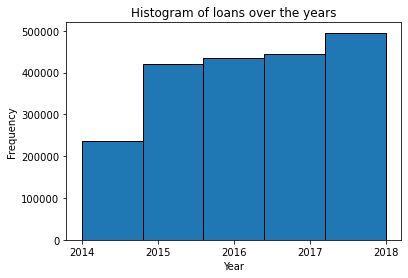

In [16]:
year_min = accepted['year'].min()
year_max = accepted['year'].max()
year = accepted['year']
plt.hist(year, histtype='bar', bins = 5, align='mid', ec = 'black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(range(year_min, 2019, 1))
plt.title('Histogram of loans over the years')
plt.show()

### Target Feature

In [17]:
# Look into the statuses used
accepted.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [18]:
# Create a value count table for loan status
loan_status = accepted.value_counts(['year', 'loan_status'])

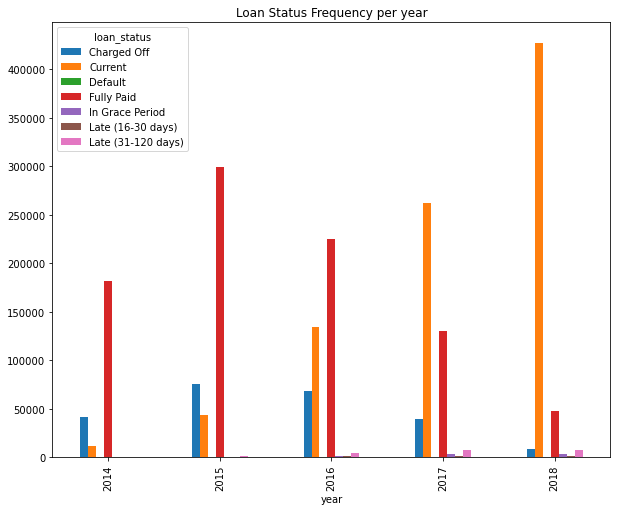

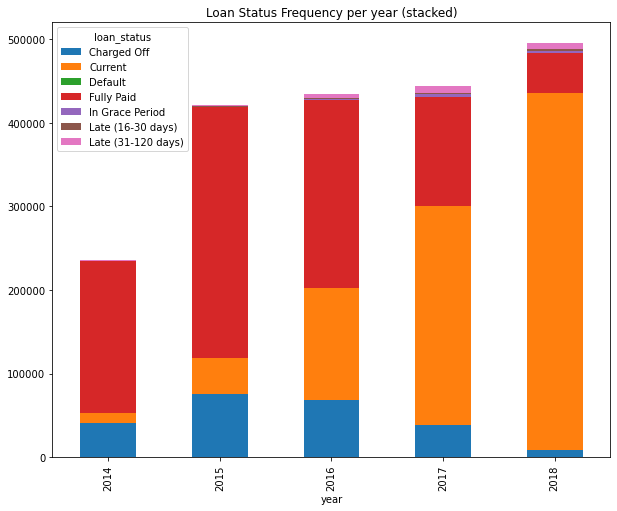

In [19]:
# Visualise the distribution of the loan status
loan_status.unstack().plot(kind='bar', figsize = (10, 8)  #plot a grouped bar chart 
                         , title='Loan Status Frequency per year');

loan_status.unstack().plot(kind='bar', stacked=True, figsize = (10, 8)  #plot a stacked grouped bar chart 
                         , title='Loan Status Frequency per year (stacked)');

As I am looking into loans that have ended, whether by default or have been paid off, I will remove those with a 'Current status. After which, the remaining will be assigned a risk grade according to the status. For example, in line with the numerical grading (ordinal) assigned to the 'grade' column, 'Fully Paid' will be assigned the lowest number, 1 and 'Charged Off' as well as 'Default' will have the highest, which is 5. The res of the loan status will be given a grading as well, using it as a defacto risk grade. 'In Grace Period' will be assigned as a 2 as they are just slightly late in paying. The number of days in late payment is used to take into account the severity of risk. So those which are 16 - 30 days late, they will be assigned a 3 and those more than that are assigned a 4.

In [20]:
# Take out the current loans as the model will be based on known outcomes
accepted = accepted[accepted['loan_status'] != 'Current']

In [21]:
# To look at the shape of the dataframe after the removal of 'Current' loans
accepted.shape

(1151641, 152)

In [22]:
# Create mapping for employment length; higher grades are assigned a lower number to reflect lower risk
loan_status_map = {'Default': 5,
              'Charged Off': 5,
              'Late (31-120 days)': 4,
              'Late (16-30 days)': 3,
              'In Grace Period': 2,
              'Fully Paid': 1}

In [23]:
# Apply new grading
accepted = accepted.replace({'loan_status': loan_status_map})

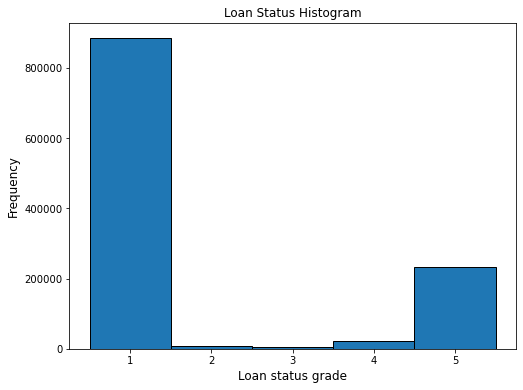

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

data = accepted['loan_status']
ax.locator_params(axis='x', integer=True)
ax.hist(data, bins=np.arange(1,7), ec="k", align='left')
ax.set_xlabel('Loan status grade', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.title.set_text('Loan Status Histogram')
plt.show()

In [25]:
# Create a value count table for loan status post changes
loan_status = accepted.value_counts(['year', 'loan_status'])

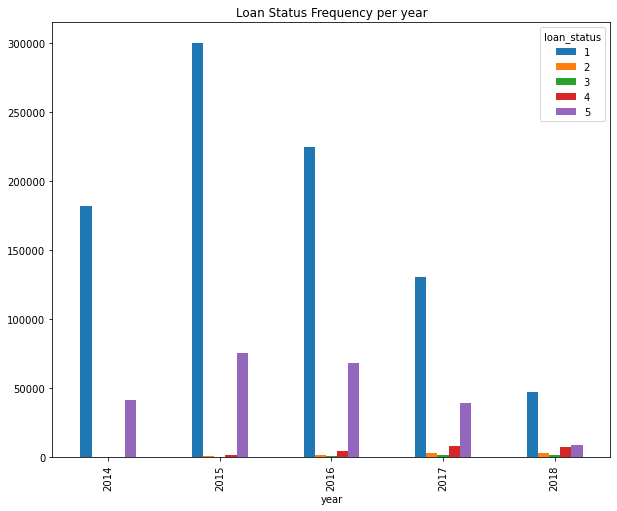

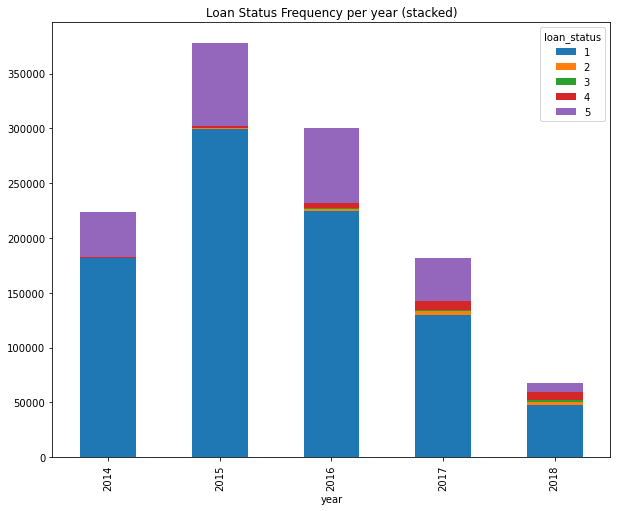

In [26]:
# Visualise the distribution of the loan status after the changes
loan_status.unstack().plot(kind='bar', figsize = (10, 8)  #plot a grouped bar chart 
                         , title='Loan Status Frequency per year');

loan_status.unstack().plot(kind='bar', stacked=True, figsize = (10, 8)  #plot a stacked grouped bar chart 
                         , title='Loan Status Frequency per year (stacked)');

It can be seen that a large number of loans in the data have been paid off, while there are only a few in the grades in between.

The next few steps would involve reviewing the data to see
* What columns and/or rows should be dropped
    * Too many null values
    * Leak data from future
* Which cell values need to be updated
* Converting ordinal values
* Which rows need to have data imputed
* Any duplicates

### 'Leaked' data from the future

Based on the descriptions from the given data dictionary, the features in the table below will not be known to an investor/lender as they are retrospective. If they are included in the model, they will expose 'hindsight' information. This will not be in line with the reality of the situation. Hence, they will be dropped from the data.

In [27]:
hindsight_cols = ['funded_amnt',
'funded_amnt_inv',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'next_pymnt_d',
'last_credit_pull_d',
'last_fico_range_high',
'last_fico_range_low',
'collections_12_mths_ex_med',
'acc_now_delinq',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'avg_cur_bal',
'chargeoff_within_12_mths',
'delinq_amnt',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'hardship_flag',
'hardship_type',
'hardship_reason',
'hardship_status',
'deferral_term',
'hardship_amount',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_length',
'hardship_dpd',
'hardship_loan_status',
'orig_projected_additional_accrued_interest',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'debt_settlement_flag',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'settlement_amount',
'settlement_percentage',
'settlement_term']

In [28]:
# Drop columns deemed to 'leak' future occurence data and unseen to the investor
accepted.drop(columns = hindsight_cols, inplace = True)

In [29]:
# Drop columns with all null values
accepted.dropna(axis = 1, how = 'all', inplace = True)

In [30]:
accepted.shape

(1151641, 85)

In [31]:
accepted.isnull().sum()

id                                           0
loan_amnt                                    0
term                                         0
int_rate                                     0
installment                                  0
grade                                        0
sub_grade                                    0
emp_title                                74782
emp_length                               72438
home_ownership                               0
annual_inc                                   0
verification_status                          0
issue_d                                      0
loan_status                                  0
pymnt_plan                                   0
url                                          0
desc                                   1136383
purpose                                      0
title                                    17094
zip_code                                     1
addr_state                                   0
dti          

### Removing columns with a single value

In [32]:
# removing columns with only one unique value 
accepted = accepted.loc[:,accepted.apply(func=pd.Series.nunique, args=(False)) > 1]

### Removing columns that will have no perceived values

In [33]:
# Following columns are to be dropped due to no perceived impact
accepted.drop(columns = ['url',
                         'emp_title',
                        'title',
                        'zip_code',
                        'initial_list_status'
                        ],
              inplace = True)

### Delinquencies within the last 2 years
There are a number of rows that have a null value in the columns that reflect the number of months since the last delinquency or major event that triggered a worse rating. This section is to check for such incidents and take them as 1 month as a conservative approach.

In [34]:
# There are a number of rows which have null values for 'mths_since_last_delinq'
# This is to check if these really have no delinquencies
null_mths_delinq = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_delinq'].isnull()]
null_mths_delinq

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year
174,68466869,4575.0,36 months,17.27,163.73,D,D3,5 years,RENT,56000.0,Not Verified,2015-12,5,n,NaN,house,NJ,10.03,1.0,May-2001,665.0,669.0,1.0,NaN,NaN,12.0,0.0,2380.0,27.0,17.0,22.0,Individual,NaN,NaN,NaN,0.0,1.0,2.0,11.0,400.0,71.0,28.0,175.0,5.0,5.0,1.0,12.0,3.0,12.0,5.0,5.0,1.0,12.0,15.0,8.0,12.0,100.0,33.3,0.0,0.0,8900.0,2380.0,1200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
259,68566711,4475.0,36 months,16.59,158.64,D,D2,10+ years,RENT,114000.0,Not Verified,2015-12,1,n,NaN,credit_card,TN,8.36,4.0,Jul-2000,670.0,674.0,2.0,NaN,55.0,5.0,1.0,5153.0,44.0,40.0,9.0,Individual,NaN,NaN,NaN,0.0,0.0,3.0,4.0,3700.0,44.0,132.0,185.0,0.0,0.0,1.0,0.0,3.0,4.0,8.0,11.0,17.0,4.0,22.0,2.0,5.0,80.0,0.0,1.0,0.0,16700.0,8108.0,11100.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
304,68426444,6425.0,36 months,15.77,225.16,D,D1,1 year,RENT,41000.0,Not Verified,2015-12,1,n,NaN,debt_consolidation,NJ,2.87,1.0,Mar-2002,670.0,674.0,2.0,NaN,27.0,4.0,1.0,476.0,7.0,13.0,23.0,Individual,NaN,NaN,NaN,1.0,0.0,2.0,4.0,1567.0,10.0,135.0,165.0,5.0,5.0,0.0,12.0,3.0,4.0,4.0,6.0,5.0,4.0,8.0,2.0,4.0,77.0,0.0,1.0,0.0,6700.0,476.0,4700.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
325,68466671,14950.0,60 months,18.99,387.73,E,E1,10+ years,MORTGAGE,68000.0,Verified,2015-12,1,n,NaN,debt_consolidation,WI,31.36,1.0,Jul-2005,685.0,689.0,1.0,NaN,82.0,11.0,1.0,5549.0,57.0,40.0,23.0,Individual,NaN,NaN,NaN,0.0,1.0,2.0,8.0,2167.0,62.0,117.0,125.0,4.0,3.0,2.0,6.0,3.0,5.0,5.0,5.0,27.0,5.0,11.0,4.0,11.0,100.0,33.3,1.0,0.0,138722.0,85740.0,6500.0,94022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
434,68486912,10000.0,36 months,13.44,339.07,C,C3,3 years,RENT,80000.0,Not Verified,2015-12,1,n,NaN,credit_card,CT,15.56,1.0,Aug-2003,670.0,674.0,1.0,NaN,38.0,9.0,1.0,8297.0,57.0,24.0,7.0,Individual,NaN,NaN,NaN,0.0,1.0,4.0,8.0,4500.0,75.0,148.0,114.0,0.0,0.0,3.0,10.0,2.0,7.0,2.0,3.0,8.0,7.0,12.0,5.0,9.0,79.0,50.0,1.0,0.0,54793.0,47467.0,9000.0,40243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242343,91595267,6050.0,36 months,14.99,209.70,C,C4,4 years,MORTGAGE,35000.0,Not Verified,2016-10,1,n,NaN,debt_consolidation,CA,17.22,1.0,Feb-1995,675.0,679.0,1.0,NaN,NaN,13.0,0.0,8104.0,66.0,16.0,18.0,Individual,NaN,NaN,NaN,1.0,1.0,3.0,3.0,1200.0,82.0,120.0,260.0,1.0,1.0,1.0,1.0,4.0,11.0,4.0,4.0,2.0,11.0,13.0,9.0,13.0,94.0,75.0,0.0,0.0,137174.0,10610.0,4800.0,3875.0,NaN,NaN,NaN,NaN,NaN,

In [35]:
# There are a number of rows which have null values for 'mths_since_last_major_derog'
# This is to check if these really have no delinquencies
null_mths_delinq = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_major_derog'].isnull()]
null_mths_delinq

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year
1,68355089,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,2015-12,1,n,NaN,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,6.0,4.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
4,68476807,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,2015-12,1,n,NaN,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,NaN,Individual,NaN,NaN,NaN,2.0,1.0,3.0,10.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
24,68476715,6000.0,36 months,7.49,186.61,A,A4,10+ years,MORTGAGE,100000.0,Not Verified,2015-12,1,n,NaN,debt_consolidation,TX,13.28,1.0,May-1994,695.0,699.0,1.0,15.0,NaN,9.0,0.0,8563.0,72.0,16.0,NaN,Individual,NaN,NaN,NaN,0.0,1.0,1.0,1.0,437.0,88.5,124.0,259.0,18.0,18.0,2.0,36.0,2.0,4.0,2.0,6.0,4.0,5.0,9.0,4.0,9.0,93.7,50.0,0.0,0.0,156354.0,22741.0,3800.0,36083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
25,67849662,4225.0,36 months,14.85,146.16,C,C5,5 years,RENT,35000.0,Source Verified,2015-12,5,n,NaN,debt_consolidation,KS,15.22,2.0,Jul-2011,725.0,729.0,0.0,18.0,NaN,6.0,0.0,1058.0,24.6,6.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2233.0,14.1,47.0,53.0,26.0,26.0,0.0,26.0,1.0,2.0,3.0,3.0,1.0,5.0,5.0,2.0,6.0,66.7,0.0,0.0,0.0,21822.0,4888.0,2600.0,17522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
35,68446769,7000.0,36 months,7.49,217.72,A,A4,10+ years,MORTGAGE,59000.0,Not Verified,2015-12,1,n,NaN,credit_card,MD,13.06,1.0,Oct-1996,730.0,734.0,1.0,23.0,NaN,10.0,0.0,10467.0,24.2,34.0,NaN,Individual,NaN,NaN,NaN,0.0,2.0,2.0,2.0,26118.0,26.0,124.0,223.0,10.0,10.0,3.0,34.0,2.0,4.0,4.0,5.0,14.0,8.0,17.0,4.0,10.0,97.1,0.0,0.0,0.0,115502.0,15804.0,35300.0,20402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260636,90245482,24000.0,60 months,12.79,543.50,C,C1,5 years,RENT,62000.0,Not Verified,2016-10,5,n,NaN,debt_consolidation,CA,14.46,1.0,Feb-2004,675.0,679.0,1.0,17.0,NaN,12.0,0.0,6780.0,34.1,22.0,NaN,Individual,NaN,NaN,NaN,1.0,0.0,2.0,3.0,11820.0,36.5,14.0,151.0,21.0,13.0,0.0,29.0,7.0,7.0,9.0,14.0,2.0,11.0,20.0,7.0,12.0,90.9,25.0,0.0

In [36]:
# As there are rows with 'mths_since_last_delinq' as null values but do have delinquencies in the last 2 years;
# taking a conservative approach, a 1 month value will be assigned for those with mths_since_last_delinq' as 
# null values but do have delinquencies in the last 2 years
accepted.loc[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_delinq'].isnull(), 'mths_since_last_delinq'] = 1

In [37]:
# Check that changes have been effected
null_mths_delinq = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_delinq'].isnull()]
null_mths_delinq

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year


In [38]:
# As delinquencies in the last 2 years might affect the rating of the borrower, taking a conservative approach,
# a 1 month value will be assigned for those with 'mths_since_last_major_derog' as 
# null values but do have delinquencies in the last 2 years
accepted.loc[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_major_derog'].isnull(), 'mths_since_last_major_derog'] = 1

In [39]:
# Check that changes have been effected
null_mths_major_derog = accepted[(accepted['delinq_2yrs'] > 0) & accepted['mths_since_last_major_derog'].isnull()]
null_mths_major_derog

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year


### DTI
According to the data dictionary, the 'dti' is:
_A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income._  
And the 'dti_joint' is:
_A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income._

As there are a number of rows with null values in the columns, I will check if there are any rows with null values in both columns as this might affect the ability to pay by the borrower.

In [40]:
null_dti = accepted[accepted['dti'].isnull() & accepted['dti_joint'].isnull()]
null_dti

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method,year


As seen, there are no rows in which have null value in both columns. Hence, in a later section, will take a aggregate of both

### Updating null values
Based on the definitions, the columns can be zero for those with null values

In [41]:
# Replace null values as zeroes
accepted[['dti',
          'inq_last_6mths',
          'mths_since_last_record',
          'mths_since_last_delinq',
          'mths_since_last_major_derog',
          'revol_util',
          'annual_inc_joint',
          'dti_joint',
          'inq_fi',
          'total_cu_tl',
          'inq_last_12m',
          'bc_open_to_buy',
          'bc_util',
          'mo_sin_old_il_acct',
          'mths_since_recent_bc',
          'num_rev_accts',
          'pct_tl_nvr_dlq',
          'percent_bc_gt_75']] = accepted[['dti',
          'inq_last_6mths',
          'mths_since_last_record',
          'mths_since_last_delinq',
          'mths_since_last_major_derog',
          'revol_util',
          'annual_inc_joint',
          'dti_joint',
          'inq_fi',
          'total_cu_tl',
          'inq_last_12m',
          'bc_open_to_buy',
          'bc_util',
          'mo_sin_old_il_acct',
          'mths_since_recent_bc',
          'num_rev_accts',
          'pct_tl_nvr_dlq',
          'percent_bc_gt_75']].fillna(0)

### Drop columns
There are a few columns with a number null values. Taking 80% as a benchmark, those with 80% and more of null values will be removed.

In [42]:
# List down columns which have more than 80% of null values
null_col = accepted.columns[accepted.isnull().mean() >= 0.8] # Get a list of columns which have more than 80% null
len(null_col) # Get the number of columns from the list to compare against before and after shape

15

In [43]:
# Current shape of data before dopping columns
accepted.shape

(1151641, 79)

In [44]:
# Drop columns based on the list in null_col, which are those with more than 80% null values
accepted.drop(columns = null_col, inplace = True)

In [45]:
# Current shape of data after dopping columns
accepted.shape

(1151641, 64)

In [46]:
accepted.isnull().sum()

id                                 0
loan_amnt                          0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     72438
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                     0
mths_since_last_delinq             0
mths_since_last_record             0
open_acc                           0
pub_rec                            0
revol_bal                          0
r

### Data types
This is to see if the data types are according to the expected types. This is for analysis

In [47]:
# Get list of datatypes of the data
accepted.dtypes

id                                object
loan_amnt                        float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                        period[M]
loan_status                        int64
pymnt_plan                        object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                      float64
earliest_cr_line                  object
fico_range_low                   float64
fico_range_high                  float64
inq_last_6mths                   float64
mths_since_last_delinq           float64
mths_since_last_record           float64
open_acc        

Employment length will need to be amended as it is considered an object datatype

In [48]:
# List down all the employment length values
accepted.emp_length.unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [49]:
# Create mapping for employment length
emp_length_dict = {'10+ years': 10,
                   '9 years': 9,
                   '8 years': 8,
                   '7 years': 7,
                   '6 years': 6,
                   '5 years': 5,
                   '4 years': 4,
                   '3 years': 3,
                   '2 years': 2,
                   '1 year': 1,
                   '< 1 year': 0}

In [50]:
# Map values to dictionary for employment length to convert to 
accepted = accepted.replace({'emp_length': emp_length_dict})

In [51]:
# Assuming that those with null values under employment leangth as 0, for a conservative approach
accepted['emp_length'] = accepted['emp_length'].fillna(0)

In [52]:
accepted.emp_length.dtypes

dtype('float64')

In [53]:
# This is to remove the spaces and the word 'months' from the 'term' column
accepted['term'] = accepted['term'].str.replace(' ', '')
accepted['term'] = accepted['term'].str.replace('months', '')
accepted['term'] = accepted['term'].astype('float64')

In [54]:
accepted.term.dtypes

dtype('float64')

In [55]:
accepted.isnull().sum()

id                             0
loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
mths_since_last_major_derog    0
applicatio

In [56]:
accepted.term.unique()

array([36., 60.])

### Consolidate for income and dti columns
These represent income type of data. 'annual_inc' and 'annual_inc_joint' shows the annual income for individual and joint/co borrowers. Similarly for 'dti' and 'dti_joint' as well. They will be aggregated and taken as 'total_inc_consol' and 'total_dti_consol'.

In [57]:
# To consolidate the total annual income to so as to assess income as a whole in the model
accepted['total_inc_consol'] = accepted['annual_inc'] + accepted['annual_inc_joint']
accepted.drop(columns = ['annual_inc', 'annual_inc_joint'], inplace = True)

In [58]:
# To consolidate the total annual income to so as to assess dti as a whole in the model
accepted['total_dti_consol'] = accepted['dti'] + accepted['dti_joint']
accepted.drop(columns = ['dti', 'dti_joint'], inplace = True)

In [59]:
# Look at the values in grade and sub_grade columns
print(sorted(accepted['grade'].unique()))
print(sorted(accepted['sub_grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [60]:
# Create mapping for employment length; higher grades are assigned a lower number to reflect lower risk
grade_dict = {'G': 7,
              'F': 6,
              'E': 5,
              'D': 4,
              'C': 3,
              'B': 2,
              'A': 1}

In [61]:
accepted = accepted.replace({'grade': grade_dict})

In [62]:
# Create new sub grade, concatenating the grade in digits and the last digit of the sub grade
accepted['sub_grade_d'] = accepted['grade'].astype(str) + accepted['sub_grade'].str.strip().str[-1]
accepted['sub_grade_d'] = accepted['sub_grade_d'].astype('int64')

In [63]:
# Check that changes ahve been effected
accepted.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,year,total_inc_consol,total_dti_consol,sub_grade_d
0,68407277,3600.0,36.0,13.99,123.03,3,C4,10.0,MORTGAGE,Not Verified,2015-12,1,n,debt_consolidation,PA,0.0,Aug-2003,675.0,679.0,1.0,30.0,0.0,7.0,0.0,2765.0,29.7,13.0,30.0,Individual,3.0,1.0,4.0,4.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,2015,55000.0,5.91,34
1,68355089,24700.0,36.0,11.99,820.28,3,C1,10.0,MORTGAGE,Not Verified,2015-12,1,n,small_business,SD,1.0,Dec-1999,715.0,719.0,4.0,6.0,0.0,22.0,0.0,21470.0,19.2,38.0,1.0,Individual,0.0,0.0,6.0,4.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,2015,65000.0,16.06,31
2,68341763,20000.0,60.0,10.78,432.66,2,B4,10.0,MORTGAGE,Not Verified,2015-12,1,n,home_improvement,IL,0.0,Aug-2000,695.0,699.0,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,Joint App,2.0,5.0,1.0,6.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,2015,134000.0,24.63,24
4,68476807,10400.0,60.0,22.45,289.91,6,F1,3.0,MORTGAGE,Source Verified,2015-12,1,n,major_purchase,PA,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,12.0,0.0,21929.0,64.5,35.0,1.0,Individual,2.0,1.0,3.0,10.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,2015,104433.0,25.37,61
5,68426831,11950.0,36.0,13.44,405.18,3,C3,4.0,RENT,Source Verified,2015-12,1,n,debt_consolidation,GA,0.0,Oct-1987,690.0,694.0,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,Individual,0.0,0.0,0.0,0.0,844.0,91.0,338.0,54.0,32.0,32.0,0.0,36.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,2015,34000.0,10.20,33


In [64]:
# Drop 'sub_grade' after feature engineering
accepted.drop(columns = ['sub_grade'], inplace = True)

In [65]:
accepted.dtypes

id                                object
loan_amnt                        float64
term                             float64
int_rate                         float64
installment                      float64
grade                              int64
emp_length                       float64
home_ownership                    object
verification_status               object
issue_d                        period[M]
loan_status                        int64
pymnt_plan                        object
purpose                           object
addr_state                        object
delinq_2yrs                      float64
earliest_cr_line                  object
fico_range_low                   float64
fico_range_high                  float64
inq_last_6mths                   float64
mths_since_last_delinq           float64
mths_since_last_record           float64
open_acc                         float64
pub_rec                          float64
revol_bal                        float64
revol_util      

### Age of oldest credit line
As the age of the credit line might have an impact on credit worthiness of the borrower, a feature will be engineered to get the how old the credit line is as of the issue date

In [66]:
# Change the format of the earliest_cr_line column to a date time format
accepted['earliest_cr_line'] = pd.to_datetime(accepted['earliest_cr_line'])
accepted['earliest_cr_line'] = accepted.earliest_cr_line.dt.to_period('m')

In [67]:
# Get the estimated age of the oldest credit line
accepted['est_age_cr_line'] = accepted.issue_d - accepted.earliest_cr_line

In [68]:
# Drop 'earliest_cr_line' after feature engineering
accepted.drop(columns = ['earliest_cr_line'], inplace = True)

In [69]:
accepted.est_age_cr_line.head()

0    <148 * MonthEnds>
1    <192 * MonthEnds>
2    <184 * MonthEnds>
4    <210 * MonthEnds>
5    <338 * MonthEnds>
Name: est_age_cr_line, dtype: object

In [70]:
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].astype(str)

In [71]:
# Create functions to remove the spaces, special characters and the word 'Monthends'
def remove_spchar(x):
    return re.sub('[\W]','',x) #removes special chracters and spaces

def remove_months(x):
    return re.sub('MonthEnds','',x) #removes the word MonthEnds

In [72]:
# Apply functions
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].map(remove_spchar)
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].map(remove_months)

In [73]:
# Convert to integers after removing unwanted characters
accepted['est_age_cr_line'] = accepted['est_age_cr_line'].astype('int')

In [74]:
accepted['est_age_cr_line'].head()

0    148
1    192
2    184
4    210
5    338
Name: est_age_cr_line, dtype: int64

## Fico

In [75]:
# Create new column that takes the median of the Fico scores
accepted['fico_median'] = accepted[['fico_range_low','fico_range_high']].median(axis=1)

In [76]:
accepted[['fico_range_low','fico_range_high', 'fico_median']].head()

,fico_range_low,fico_range_high,fico_median
0,675.0,679.0,677.0
1,715.0,719.0,717.0
2,695.0,699.0,697.0
4,695.0,699.0,697.0
5,690.0,694.0,692.0


In [77]:
# Drop 'fico_range_low','fico_range_high' after feature engineering
accepted.drop(columns = ['fico_range_low','fico_range_high'], inplace = True)

## Object datatypes

In [78]:
object_col = accepted.select_dtypes('object').columns
object_col

Index(['id', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state', 'application_type', 'disbursement_method'],
      dtype='object')

In [79]:
accepted.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE'], dtype=object)

In [80]:
accepted.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [81]:
accepted.pymnt_plan.unique()

array(['n', 'y'], dtype=object)

In [82]:
accepted.purpose.unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [83]:
accepted.application_type.unique()

array(['Individual', 'Joint App'], dtype=object)

In [84]:
accepted.disbursement_method.unique()

array(['Cash', 'DirectPay'], dtype=object)

The following columns will be kept as object datatypes for EDA purposes in the next notebook
* home_ownership
* verification_status
* pymnt_plan
* purpose
* application_type
* disbursement_method

In [85]:
accepted.select_dtypes('object').columns

Index(['id', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state', 'application_type', 'disbursement_method'],
      dtype='object')

Some states can get effected by the situation in neighbouring states, it would also be easier to group the states together.

In [86]:
# Define regions in the United States
region_dict = {'west' : ['CA', 'OR', 'NV', 'WA', 'ID', 'UT', 'AZ', 'NM', 'CO', 'WY', 'MT', 'AK','HI'],
               'midwest' : ['MD', 'MN', 'WY', 'SD', 'NE', 'KS', 'MO', 'IA', 'WI', 'IL', 'MI', 'IN', 'OH'],
               'northeast' : ['ME', 'NH', 'VT', 'PA', 'CT', 'NY', 'MA', 'CT', 'NJ', 'RI'],
               'south' : ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV', 'DC', 'MD', 'DE']}

accepted['region'] = accepted.addr_state.map({item: k for k, v in region_dict.items() for item in v})

In [87]:
accepted['region'].unique()

array(['northeast', 'midwest', 'south', 'west', nan], dtype=object)

In [88]:
accepted.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,year,total_inc_consol,total_dti_consol,sub_grade_d,est_age_cr_line,fico_median,region
0,68407277,3600.0,36.0,13.99,123.03,3,10.0,MORTGAGE,Not Verified,2015-12,1,n,debt_consolidation,PA,0.0,1.0,30.0,0.0,7.0,0.0,2765.0,29.7,13.0,30.0,Individual,3.0,1.0,4.0,4.0,1506.0,37.2,148.0,128.0,3.0,3.0,1.0,4.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,2015,55000.0,5.91,34,148,677.0,northeast
1,68355089,24700.0,36.0,11.99,820.28,3,10.0,MORTGAGE,Not Verified,2015-12,1,n,small_business,SD,1.0,4.0,6.0,0.0,22.0,0.0,21470.0,19.2,38.0,1.0,Individual,0.0,0.0,6.0,4.0,57830.0,27.1,113.0,192.0,2.0,2.0,4.0,2.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,2015,65000.0,16.06,31,192,717.0,midwest
2,68341763,20000.0,60.0,10.78,432.66,2,10.0,MORTGAGE,Not Verified,2015-12,1,n,home_improvement,IL,0.0,0.0,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,0.0,Joint App,2.0,5.0,1.0,6.0,2737.0,55.9,125.0,184.0,14.0,14.0,5.0,101.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,2015,134000.0,24.63,24,184,697.0,midwest
4,68476807,10400.0,60.0,22.45,289.91,6,3.0,MORTGAGE,Source Verified,2015-12,1,n,major_purchase,PA,1.0,3.0,12.0,0.0,12.0,0.0,21929.0,64.5,35.0,1.0,Individual,2.0,1.0,3.0,10.0,4567.0,77.5,128.0,210.0,4.0,4.0,6.0,4.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,2015,104433.0,25.37,61,210,697.0,northeast
5,68426831,11950.0,36.0,13.44,405.18,3,4.0,RENT,Source Verified,2015-12,1,n,debt_consolidation,GA,0.0,0.0,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,0.0,Individual,0.0,0.0,0.0,0.0,844.0,91.0,338.0,54.0,32.0,32.0,0.0,36.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,2015,34000.0,10.20,33,338,692.0,south


In [89]:
# Get list of columns with object datatypes
accepted.select_dtypes('object').columns

Index(['id', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state', 'application_type', 'disbursement_method', 'region'],
      dtype='object')

In [90]:
# Create test dataset
test = accepted[accepted['issue_d'].dt.year > 2016]

In [91]:
# Check the latest date in the test data
test.issue_d.max()

Period('2018-12', 'M')

In [92]:
# Check the earliest date in the test data
test.issue_d.min()

Period('2017-01', 'M')

In [93]:
test.shape

(249789, 62)

In [94]:
# Create train dataset
train = accepted[accepted['issue_d'].dt.year < 2017]

In [95]:
# Check the latest date in the train data
train.issue_d.max()

Period('2016-12', 'M')

In [96]:
# Check the earliest date in the train data
train.issue_d.min()

Period('2014-01', 'M')

In [97]:
train.shape

(901852, 62)

In [98]:
accepted.shape

(1151641, 62)

The split of the data between train and test is 78.3% to 21.7% which is around the optimal 'rule-of thumb' split.

In [99]:
#Save out updated dataframes to csv file
train.to_csv('../datasets/train_1.csv',index=False)
test.to_csv('../datasets/test_1.csv',index=False)

**Payoff vs Risk**  
Loan status vs interest rate